In [1]:
import pandas as pd
import numpy as np 
import statistics 

file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path,sheet_name='IRCTC Stock Price')
print("Initial DataFrame")
print(df.head())

prices = df['Price'].dropna()
print(prices.head())

Mean = statistics.mean(prices)
Variance = statistics.variance(prices)

print("Mean of the Prices",Mean)
print("Variance of the Prices",Variance)

Initial DataFrame
           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  
0    2081.85
1    2077.75
2    2068.85
3    2072.95
4    2078.25
Name: Price, dtype: float64
Mean of the Prices 1560.663453815261
Variance of the Prices 58732.365352539186


In [2]:
# Create a boolean mask for the day of the week
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'].dt.day_name() == 'Wednesday']
#print(filtered_df)
Wed_Mean = statistics.mean(filtered_df['Price'].dropna())
print("Mean of Wednesday",Wed_Mean)

Mean of Wednesday 1550.706


In [3]:
filtered_df = df[df['Date'].dt.month_name() == 'April']
print(filtered_df)
Apr_Mean = statistics.mean(filtered_df['Price'].dropna())
print("Mean of April",Apr_Mean)

         Date Month  Day    Price     Open     High      Low   Volume    Chg%
41 2021-04-30   Apr  Fri  1791.40  1784.90  1809.15  1757.75  756.66K -0.0006
42 2021-04-29   Apr  Thu  1792.55  1801.00  1818.00  1765.30    1.21M -0.0018
43 2021-04-28   Apr  Wed  1795.85  1800.00  1818.00  1775.00    1.54M  0.0015
44 2021-04-27   Apr  Tue  1793.20  1730.00  1802.60  1714.65    2.26M  0.0360
45 2021-04-26   Apr  Mon  1730.85  1721.90  1739.25  1718.00  791.76K  0.0110
46 2021-04-23   Apr  Fri  1712.00  1670.00  1717.90  1661.00    1.63M  0.0233
47 2021-04-22   Apr  Thu  1673.05  1614.00  1681.00  1614.00  988.50K  0.0201
48 2021-04-20   Apr  Tue  1640.05  1616.00  1648.95  1616.00    1.14M  0.0170
49 2021-04-19   Apr  Mon  1612.70  1550.00  1620.00  1550.00    1.19M -0.0091
50 2021-04-16   Apr  Fri  1627.45  1611.00  1638.10  1606.00  968.08K  0.0120
51 2021-04-15   Apr  Thu  1608.10  1592.10  1632.90  1589.00    1.16M -0.0022
52 2021-04-13   Apr  Tue  1611.65  1582.05  1623.00  1582.05    

In [4]:
# Create a new column 'Is_Loss' where True indicates a loss
df['Is_Loss'] = df['Chg%'].apply(lambda x: x < 0)

# Display the DataFrame with the new column
print(df.head())

# Calculate the number of losses and total number of records
num_losses = df['Is_Loss'].sum()
total_records = len(df)

# Calculate the probability of making a loss
probability_of_loss = num_losses / total_records

print(f'Probability of Making a Loss: {probability_of_loss:.2f}')


        Date Month  Day    Price     Open     High      Low   Volume    Chg%  \
0 2021-06-29   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M  0.0020   
1 2021-06-28   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K  0.0043   
2 2021-06-25   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K -0.0020   
3 2021-06-24   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K -0.0026   
4 2021-06-23   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K -0.0023   

   Is_Loss  
0    False  
1    False  
2     True  
3     True  
4     True  
Probability of Making a Loss: 0.50


In [20]:

profit_wed = df['Chg%'].loc[(df['Day'] == 'Wed') & (df['Chg%'] >0)].count()

print("the probability of making a profit on Wednesday\n")
print(profit_wed/total_records)

# Filter the data for Wednesdays
wednesday_data = df[df['Day'] == 'Wednesday']

# Calculate the total number of Wednesdays
total_wednesdays = len(wednesday_data)

# Calculate the total number of days in the dataset
total_days = len(df)

# Calculate the number of profitable Wednesdays
profitable_wednesdays = len(wednesday_data[wednesday_data['Chg%'] > 0])

# Calculate the probability that any given day is a Wednesday
probability_wednesday = total_wednesdays / total_days

# Calculate the joint probability that a day is both a Wednesday and a profitable day
probability_profit_and_wednesday = profitable_wednesdays / total_days

# Calculate the conditional probability of making a profit given that today is Wednesday
conditional_probability_profit_given_wednesday = probability_profit_and_wednesday / probability_wednesday if probability_wednesday != 0 else 0

print(f"Conditional Probability of making profit given Wednesday: {conditional_probability_profit_given_wednesday:.2f}")


the probability of making a profit on Wednesday

0.08433734939759036
Conditional Probability of making profit given Wednesday: 0.00


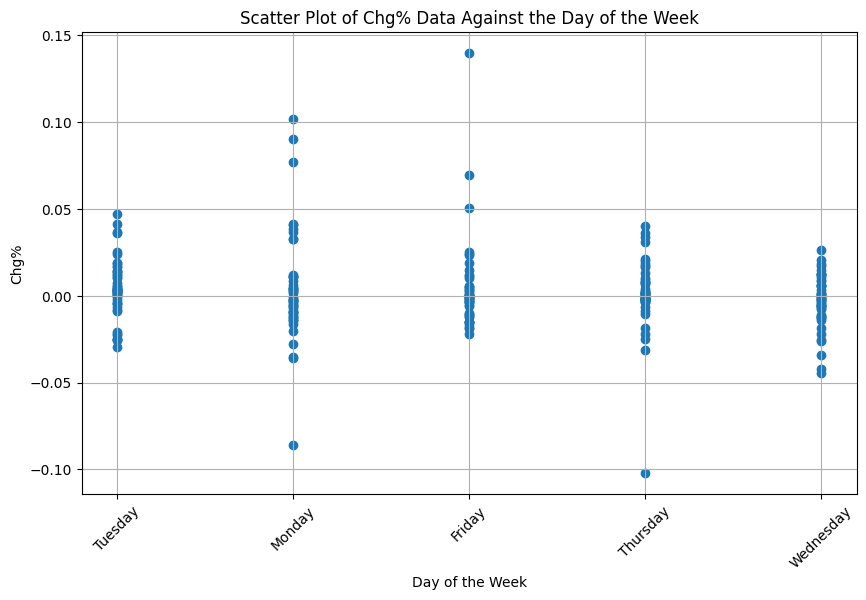

In [21]:
import matplotlib.pyplot as plt

# Create a new column for the day of the week
df['Day of Week'] = df['Date'].dt.day_name()

# Scatter plot of Chg% vs Day of the Week
plt.figure(figsize=(10, 6))
plt.scatter(df['Day of Week'], df['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% Data Against the Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
